import packages

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import dataset

In [86]:
df = pd.read_csv("Random Data.csv")

X = np.array(df['X'])
Y = np.array(df['Y'])
Z = np.array(df['Z'])

# cumulative values of length in each axis
Xc = np.reshape(np.cumsum(X),(1000,1))
Yc = np.reshape(np.cumsum(Y),(1000,1))
Zc = np.reshape(np.cumsum(Z),(1000,1))

visualisation of made-up data set

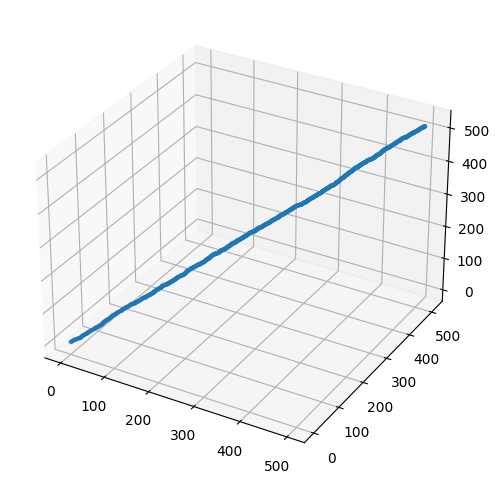

In [87]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')


ax.scatter(Xc, Yc, Zc, marker='.')
plt.show()

training for regression

In [88]:
order = 1
                                   
poly = PolynomialFeatures(order)            # degree = 1
P = poly.fit_transform(Xc)

if P.shape[0] > P.shape[1]:                     
    wp = inv(P.T @ P) @ P.T @ Yc            # overdetermined
else: wp = P.T @ inv(P @ P.T) @ Yc          # underdetermined

wp

array([[-5.27816168],
       [ 1.03155509]])